<a href="https://colab.research.google.com/github/jumafernandez/BDM/blob/master/Guias/Guia_Arboles_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árboles de decisión con Scikit Learn (Aprendizaje supervisado)

Vamos a trabajar con _árboles de clasificación_ a partir del dataset iris,
con el que ya hemos trabajado algunas cuestiones de análisis exploratorio.
<br />
<br />
### Trabajando con datos en Scikit Learn (Python)
Para iniciar debemos importar la librería _iris_ que está incluida en Scikit Learn. También podríamos exportarla desde un archivo csv como veníamos trabajando. 
<br />
<br />
Para importarla desde un archivo:

In [0]:
carpeta_iris = "C:\Users\unlu\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv"


En cambio, para importarla desde Scikit Learn debemos traer la librería y cargarla:

In [5]:
# Importamos el dataset iris de la librerías sklearn.datasets
from sklearn.datasets import load_iris

# Iris será un objeto "bunch" que es básicamente un diccionario de Python con un conjunto de claves
iris = load_iris()

print("Podemos pedir una descripción del dataset: ")
print(iris.DESCR)


Podemos pedir una descripción del dataset: 
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ======

Entre otros atributos, como los que se consultan a continuación:

In [10]:
print("Podemos ver los nombres de las features del dataset " + str(iris.feature_names))

print("Los posibles valores de la variable objetivo" + str(iris.target_names))

print("Donde está almacenado el archivo: " + iris.filename)

Podemos ver los nombres de las features del dataset ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Los posibles valores de la variable objetivo['setosa' 'versicolor' 'virginica']
Donde está almacenado el archivo: /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv


Scikit Learn tiene la particularidad que separa los valores de las features de la clase, a través de dos estructuras de datos diferentes:

In [30]:
print("Podemos ver los valores de las features -Por ejemplo, las primeras 5 instancias-:\n" + str(iris.data[0:5,]))
print("\nLa matriz de features es del tipo: + " + str(type(iris.data[0:5,])))
print("\nY por otro lado, los valores de la variable objetivo " + str(iris.target[0:5]))

Podemos ver los valores de las features -Por ejemplo, las primeras 5 instancias-:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

La matriz de features es del tipo: + <class 'numpy.ndarray'>

Y por otro lado, los valores de la variable objetivo [0 0 0 0 0]


## Árboles de Clasificación en Scikit Learn

A continuación, vamos a explorar como entrenar un árbol de clasificación, analizar el modelo entrenado y evaluarlo:

In [0]:
# Importamos tree, donde están implementados las técnicas relativas a árboles para trabajar con J-48 (Árboles de Decisión)
from sklearn import tree

# Instanciamos el árbol como un árbol de clasificación (existen varias técnicas basadas en árboles)
# Definimos que el criterio a utilizar para el entrenamiento es la entropia (Podría ser Gini, por ejemplo)
arbol = tree.DecisionTreeClassifier(criterion='entropy')


Ahora vamos a entrenar el árbol, para ello le pasamos los datos de los _features_ y el _target_:

In [0]:
# Ahora vamos a entrenar el dato con el método fit -le pasamos los X e Y
# X e Y (X=atributos e Y=target)
arbol = arbol.fit(iris.data, iris.target)


También puedo graficar el árbol resultante:

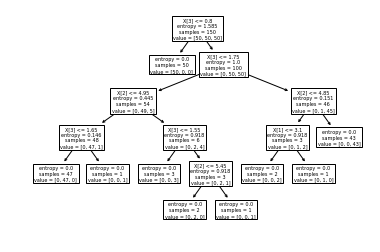

In [36]:
grafico=tree.plot_tree(arbol)